# Project 3
## clustering, dimensionality reduction, and non-monotonous neurons

### Members:
* Akhilesh Vyas
* Pooja Bhatia
* Asif Altaf 
* Abakar Bouba
* Mehdi Ali
* Seyithan Dag
* Mihail Luchian
* Muhammad Hassan Farooq
* Utkrist Adhikari
* Julian Tanke
* Omid Najaee Nezhad
* Hosam Alqaderi

### 3.1 fun with k-means clustering

Plot the data, then implement
* Llyoyd's algorithm for k-means clustering
* Hartigan's algorithm for k-means clustering
* MacQueen's algorithm for k-means clustering

for k=3 run and plot.

COSTS:
	Llyod's:	 0.01809835433959961
	Hartigan:	 0.027765989303588867
	MacQueen:	 0.0015964508056640625


/root/miniconda3/lib/python3.6/site-packages/scipy/cluster/vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "
/root/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/root/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


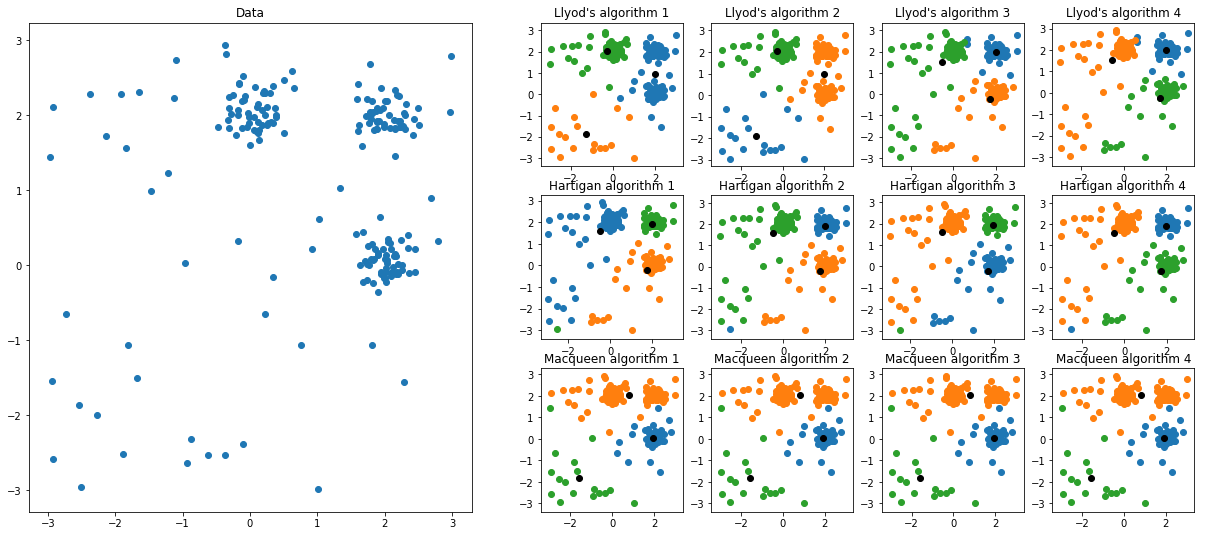

In [61]:
%matplotlib inline
import numpy as np
from numpy.random import randint
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy.linalg as la
import sys
from time import time
import scipy

from scipy.cluster.vq import kmeans2

data = genfromtxt('data-clustering-1.csv', delimiter=',', dtype=np.float32)
x, y = data[0,:], data[1,:]

# ----------- Lloyd ---------------
def lloyd(data, k=3):
    return kmeans2(data, k)


# ---------- Hartigan -------------
def hartigan(data, K=3):
    # randomly assign to cluster
    n,m = data.shape
    labels = randint(0, K, n)
    
    # ---------------------------------
    def E(data, labels):
        """ Cost function
        """
        total_cost = 0
        for k in range(K):
            data_k = data[(labels == k).nonzero()]
            mu_k = np.mean(data_k, 0)
            cost_k = np.sum(la.norm(data_k - mu_k, axis=1))
            total_cost += cost_k
        return total_cost
    # ---------------------------------
    
    converged = False
    while not converged:
        converged = True
        
        for j in range(n):
            C_i = labels[j]
            
            min_cost = E(data, labels)
            C_w = C_i
            
            for k in range(K):
                #if k == C_i:
                #    continue
                labels[j] = k
                cost = E(data, labels)
                if cost < min_cost:
                    min_cost = cost
                    C_w = k
            
            if C_w != C_i:
                converged = False
            
            labels[j] = C_w
    
    # calculate mean for all clusters
    mu = [np.mean(data[(labels == k).nonzero()], 0) for k in range(K)]
    
    return mu, labels
        

# --------- MacQueen --------------
def macqueen(data, K=3):
    n, m = data.shape
    C = [0] * K
    N = [0] * K
    labels = np.zeros((n,))
    Mu = np.zeros((K, m))
    
    for j, x in enumerate(data):
        min_cost = sys.float_info.max
        w = -1
        for k in range(K):
            cost = la.norm(x - Mu[k])
            if min_cost > cost:
                min_cost = cost
                w = k
        assert w > -1
        N[w] += 1
        Mu[w] += 1/N[w] * (x - Mu[w])
        labels[j] = w
    
    return Mu, labels

# -------- plotting ---------------
fig = plt.figure(figsize=(27, 9))
ax = fig.add_subplot(131)
ax.set_title('Data')
ax.scatter(x, y)
# --

def plot_algorithm(ax, data, algorithm, title):
    centers, labels = algorithm(data.T)
    locs_a, locs_b, locs_c =\
    (labels == 0).nonzero(), (labels == 1).nonzero(), (labels == 2).nonzero()
    ax.scatter(x[locs_a], y[locs_a])
    ax.scatter(x[locs_b], y[locs_b])
    ax.scatter(x[locs_c], y[locs_c])
    for c in centers:
        ax.scatter([c[0]], [c[1]], color='black')
    ax.set_title(title)

plot_algorithm(fig.add_subplot(3,9,4), data, lloyd, 'Llyod\'s algorithm 1')
plot_algorithm(fig.add_subplot(3,9,5), data, lloyd, 'Llyod\'s algorithm 2')
plot_algorithm(fig.add_subplot(3,9,6), data, lloyd, 'Llyod\'s algorithm 3')
plot_algorithm(fig.add_subplot(3,9,7), data, lloyd, 'Llyod\'s algorithm 4')

plot_algorithm(fig.add_subplot(3,9,13), data, hartigan, 'Hartigan algorithm 1')
plot_algorithm(fig.add_subplot(3,9,14), data, hartigan, 'Hartigan algorithm 2')
plot_algorithm(fig.add_subplot(3,9,15), data, hartigan, 'Hartigan algorithm 3')
plot_algorithm(fig.add_subplot(3,9,16), data, hartigan, 'Hartigan algorithm 4')

plot_algorithm(fig.add_subplot(3,9,22), data, macqueen, 'Macqueen algorithm 1')
plot_algorithm(fig.add_subplot(3,9,23), data, macqueen, 'Macqueen algorithm 2')
plot_algorithm(fig.add_subplot(3,9,24), data, macqueen, 'Macqueen algorithm 3')
plot_algorithm(fig.add_subplot(3,9,25), data, macqueen, 'Macqueen algorithm 4')


def calculate_runtime(data, algorithm, runs=20):
    __start = time()
    for i in range(20):
        algorithm(data)
    __end = time()
    return __end - __start

print("COSTS:")
print("\tLlyod's:\t", calculate_runtime(data, lloyd))
print("\tHartigan:\t", calculate_runtime(data, hartigan))
print("\tMacQueen:\t", calculate_runtime(data, macqueen))

plt.show()

### 3.2: spectral clustering


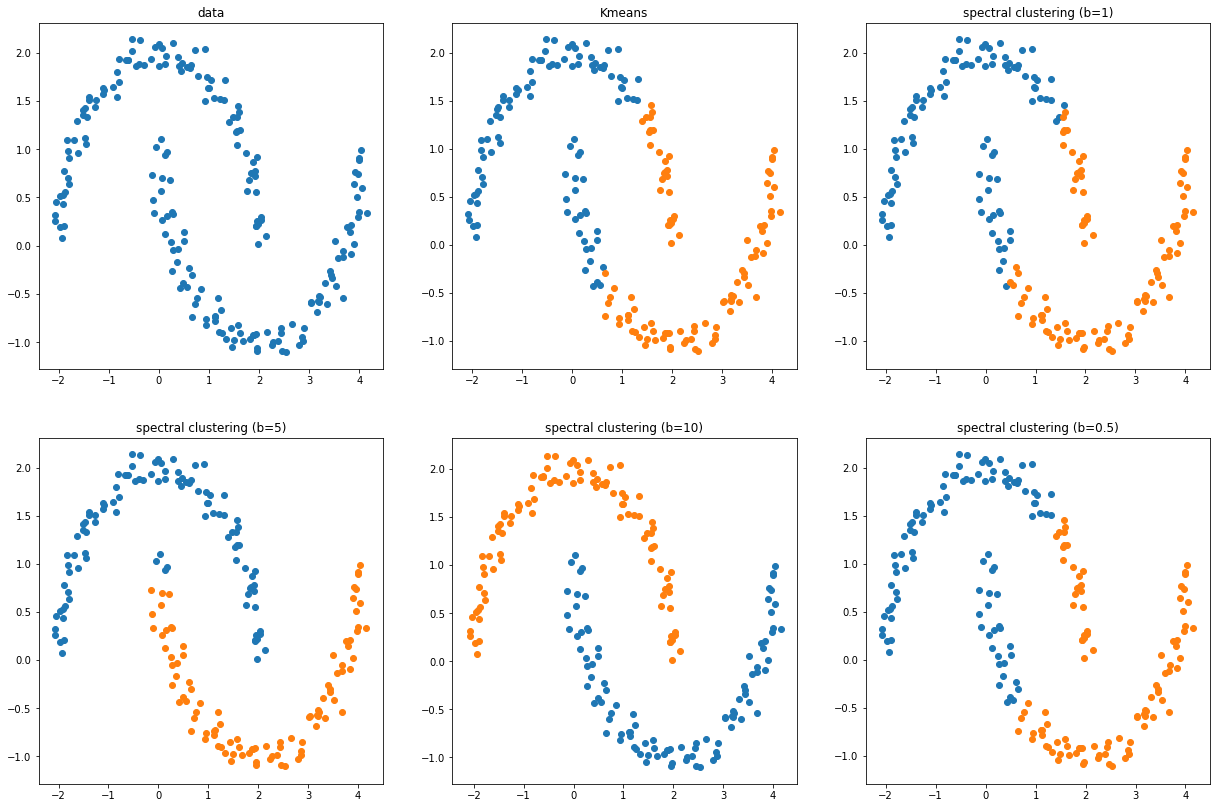

In [89]:
%matplotlib inline
import numpy as np
from numpy.random import randint
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy.linalg as la
import sys
from time import time
import scipy
import sklearn.metrics as mt


#help(mt.pairwise_distances)

from scipy.cluster.vq import kmeans2

data = genfromtxt('data-clustering-2.csv', delimiter=',', dtype=np.float32)
x, y = data[0,:], data[1,:]

# ---------- kmeans -------------
_, labels_kmeans = kmeans2(data.T, 2)

# --- spectral clustering -------
def spectral_clustering(data, beta=1):
    """ k is always 2 in this case
    """
    S = np.exp(-beta * mt.pairwise_distances(data.T, metric='euclidean'))
    D = np.diag(np.sum(S, axis=0))
    L = D - S
    
    w,v = la.eigh(L)  # eigenvalues are not necessarily sorted!!
    
    # get second-smallest
    w[np.argmin(w)] = sys.float_info.max
    u2 = v[:,np.argmin(w)]  # 2. smallest eigenvalue

    labels = (u2 > 0) * 1
    return labels
    
labels_sc = spectral_clustering(data)
    
# ----------- plot --------------
def plot_algorithm(ax, data, labels, title):
    locs_a, locs_b = (labels == 0).nonzero(), (labels == 1).nonzero()
    ax.scatter(x[locs_a], y[locs_a])
    ax.scatter(x[locs_b], y[locs_b])
    ax.set_title(title)


fig = plt.figure(figsize=(21, 14))
ax = fig.add_subplot(231)
ax.scatter(x, y)
ax.set_title('data')

plot_algorithm(fig.add_subplot(232), data, labels_kmeans, 'Kmeans')
plot_algorithm(fig.add_subplot(233), data, labels_sc, 'spectral clustering (b=1)')
plot_algorithm(fig.add_subplot(234), data, spectral_clustering(data, beta=5), 
               'spectral clustering (b=5)')
plot_algorithm(fig.add_subplot(235), data, spectral_clustering(data, beta=10), 
               'spectral clustering (b=10)')
plot_algorithm(fig.add_subplot(236), data, spectral_clustering(data, beta=0.5), 
               'spectral clustering (b=0.5)')

plt.show()

### 3.3 dimensionality reduction



Shape of X:  (500, 150)
Shape of Y:  (150,)
Shape of mu:  (500, 1)
Shape of covariance matrix:  (500, 500)
Shape of eigen vector matrix:  (500, 500)
Shape of decoder:  (500, 2)
Shape of projected data:  (2, 150)
(500, 500)
Shape of S_B:  (500, 500)
Shape of S_W:  (500, 500)


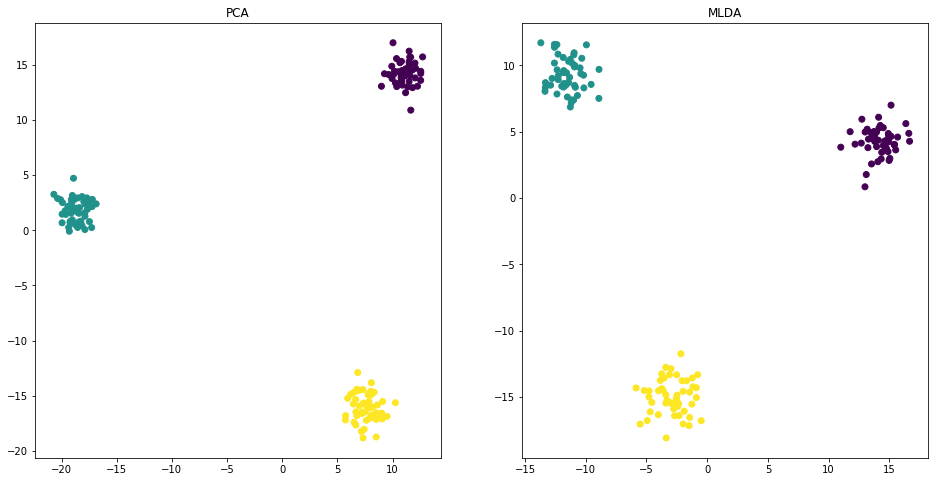

In [94]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys


def multiClassLDA(X,Y,k):
    mu = np.reshape(np.mean(X, axis=1), newshape=(X.shape[0], 1))
    uniqueLabels = np.unique(Y)

    m,n = X.shape
    S_B = np.zeros(shape=(m,m))
    S_W = np.zeros(shape=(m,m))

    print(S_B.shape)

    for l in uniqueLabels:
        label_indices = np.ndarray.flatten(np.argwhere((Y == l) * 1.))
        X_l = X.T[label_indices].T
        mu_l = np.reshape(np.mean(X_l, axis=1), newshape=(X_l.shape[0], 1))
        cov_l = np.cov(X_l, rowvar=1, ddof=1)
        S_B += np.matmul(mu_l-mu,(mu_l-mu).T)
        S_W += cov_l

    print("Shape of S_B: ",S_B.shape)
    print("Shape of S_W: ", S_W.shape)

    eigenVals, eigenDecoder = np.linalg.eigh(np.matmul(np.linalg.pinv(S_W),S_B))
    eigenVals = np.flip(eigenVals, axis=-1)
    eigenDecoder = np.flip(eigenDecoder, axis=1)
    # Take frst k columns of the decoder
    decoder = eigenDecoder[:, :k]

    Z = np.matmul(decoder.T, X)

    return Z

def applyPCA(X,k):
    m, n = X.shape

    # Step 1: Mean normalization
    mu = np.reshape(np.mean(X, axis=1), newshape=(m, 1))
    print("Shape of mu: ", mu.shape)

    X_normalized = X - mu

    # Step 2: Compute covariance matrix
    X_Cov = np.cov(X_normalized, rowvar=1, ddof=1)

    print("Shape of covariance matrix: ", X_Cov.shape)

    # Step 3: Compute eigenvectors and eigenvalues of the covariance matrix
    # Note: If using np.eig() instead of np.eigh() projections will be complex numbers
    # Ascending order
    eigenVals, eigenDecoder = np.linalg.eigh(X_Cov)
    # Descending order
    eigenVals = np.flip(eigenVals, axis=-1)
    eigenDecoder = np.flip(eigenDecoder,axis=1)

    # Take frst k columns of the decoder
    decoder = eigenDecoder[:, :k]

    print("Shape of eigen vector matrix: ", eigenDecoder.shape)
    print("Shape of decoder: ", decoder.shape)

    # Poject into R^k
    Z = np.matmul(decoder.T, X_normalized)

    print("Shape of projected data: ", Z.shape)

    return Z

# --------------------------

pathX = 'data-dimred-X.csv'
pathY = 'data-dimred-y.csv'
X = np.loadtxt(fname=pathX,delimiter=',',dtype=float)
Y = np.loadtxt(fname=pathY, dtype=float)
k = 2

print("Shape of X: ",X.shape)
print("Shape of Y: ", Y.shape)

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# PCA
projectedPCA = applyPCA(X, k)
# print(projected)
ax1.scatter(projectedPCA.T[:, 0], projectedPCA.T[:, 1], c=Y)
ax1.set_title('PCA')


# Multiclass LDA
projectedLDA = multiClassLDA(X, Y,k)
ax2.scatter(projectedLDA.T[:, 0], projectedLDA.T[:, 1], c=Y)
ax2.set_title('MLDA')

# Axes3D.scatter(xs=projected,ys=Y)
plt.show()

### 3.4 non-monotonous neurons

$$
\sum_{i=1}^{n} \frac{1}{i}
$$

epoch: 0
epoch: 100
epoch: 200
epoch: 300
epoch: 400
epoch: 500
epoch: 600
epoch: 700
epoch: 800
epoch: 900


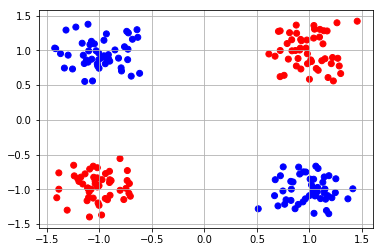

In [106]:
import numpy as np
import matplotlib.pyplot as plt

X = np.loadtxt('xor-X.csv', delimiter=',')
Y = np.loadtxt('xor-y.csv', delimiter=',');
X = X.T

#X = np.array(zip(X[0], X[1]))

theta = np.random.uniform(-1, 1)
w = np.array([np.random.uniform(-1, 1), np.random.uniform(-1, 1)])

def plot(y): 
    #mat = np.array(zip(*X)).reshape([2, 200])
    mat = X.T.copy()
    plt.scatter(mat[0], mat[1], c=['b' if i > 0  else 'r' for i in y])

def calculate_exp(x, w, theta):
    return np.exp(-1 / 2 * np.square(np.subtract(np.matmul(w.transpose(), x), theta)))

def activation_function(x, w, theta):
    return 2 * calculate_exp(x, w, theta) - 1

'''
1. initialize w and theta
2. calculate deltaW and deltaT for all 200 samples
3. update deltaW, T and go over all examples again for 1000 times 
'''

learning_curve = 0.01
errors = []
epochs = 1000
for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch:', epoch)
    DT, DW, ET = 0, 0, 0
    for i in np.random.permutation(n):
        x = X[i]
        diffY = activation_function(X[i], w, theta) - Y[i]        
        exp = calculate_exp(x, w, theta)
        DT += diffY * 2 * exp * (np.matmul(x, w) - theta) 
        DW += diffY * 2 * exp * (np.matmul(x, w) - theta) * x * -1
        ET +=  0.5 * (diffY ** 2)
        
    w = w - learning_curve * DW
    theta = theta - learning_curve * DT
    errors.append(ET)
    
plt.grid(True)
y_ = [activation_function(X[i], w, theta) for i in range(len(Y))]
plot(y_)
plt.show()

### 3.5 exploring numerical instabilities


/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RankWarning: The fit may be poorly conditioned


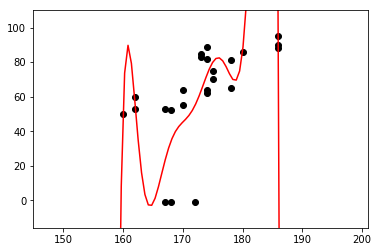

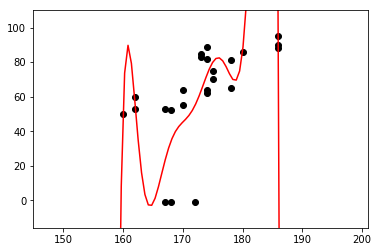

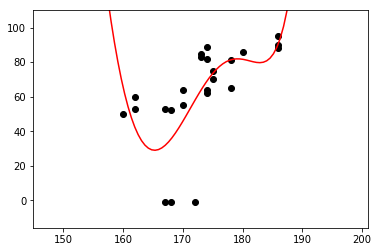

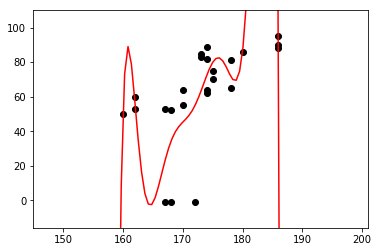

In [117]:
import numpy as np
import numpy.linalg as la
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

dataPath = 'whData.dat'
data = np.loadtxt(dataPath, dtype=np.object, comments='#', delimiter=None)
ws = data[:, 0].astype('int32')
hs = data[:, 1].astype('int32')
gs = data[:, 2]


hgt = hs
wgt = ws

xmin = hgt.min() - 15
xmax = hgt.max() + 15
ymin = wgt.min() - 15
ymax = wgt.max() + 15

def plot_data_and_fit(h, w, x, y):
    plt.plot(h, w, 'ko', x, y, '-r')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.show()
    
def trsf(x):
    return x / 100.

n = 10
x = np.linspace(xmin, xmax, 100)

# method 1 (reg poly)
c = poly.polyfit(hgt, wgt, n)
y = poly.polyval(x, c)
plot_data_and_fit(hgt, wgt, x, y)

# method 2 (reg with vnader and pinv)
X = poly.polyvander(hgt, n)
c = np.dot(la.pinv(X), wgt)
plot_data_and_fit(hgt, wgt, x, y)

# method 3 (reg using vander ans lstsq)
X = poly.polyvander(hgt, n)
c = la.lstsq(X, wgt)[0]
y = np.dot(poly.polyvander(x,n), c)
plot_data_and_fit(hgt, wgt, x, y)

# method 4 (reg on tr data using vand met)
X = poly.polyvander(trsf(hgt), n)
c = np.dot(la.pinv(X), wgt)
y = np.dot(poly.polyvander(trsf(x), n), c)
plot_data_and_fit(hgt, wgt, x, y)